In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AmesHousing.csv')
df.drop(['Order'],axis = 1,inplace=True)
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Important Information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

# Finding Correlation between target label and feature columns

In [4]:
df.corr()["SalePrice"].sort_values()[:-1]

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

### Visualizing our highly correlated data 

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

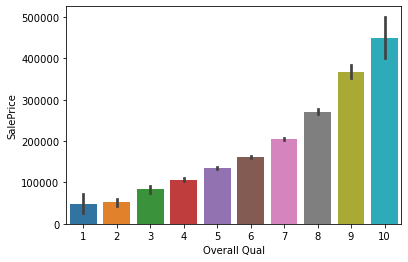

In [5]:
sns.barplot(x="Overall Qual",y ="SalePrice",data=df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

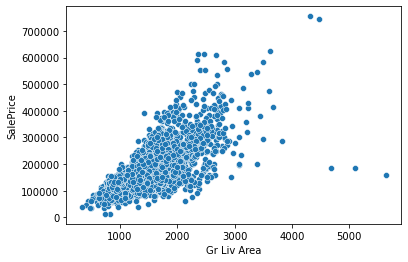

In [6]:
sns.scatterplot(x="Gr Liv Area",y ="SalePrice",data=df)

Linear Relationship identified

# Outlier Removal from highly correlated data

In [7]:
outlier_index = df[(df["Gr Liv Area"]>4000) & (df["SalePrice"]<400000)].index

In [8]:
df = df.drop(index = outlier_index,axis = 0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

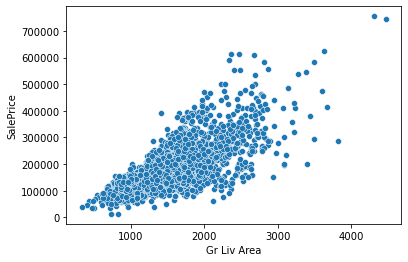

In [9]:
sns.scatterplot(x="Gr Liv Area",y ="SalePrice",data=df)

### Visualizing our Target Label column

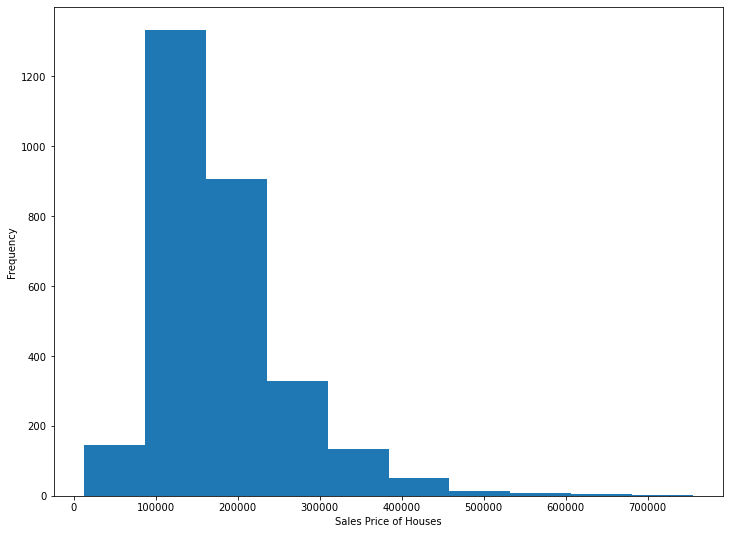

In [10]:
plt.figure(figsize= (12,9))
plt.hist(df["SalePrice"])
plt.xlabel("Sales Price of Houses")
plt.ylabel("Frequency");

# Remove Missing Values

In [11]:
df.drop('PID',axis=1,inplace =True)

In [12]:
100 * df.isnull().sum()/ len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

#### Lets Create a function that we will call each time we need to find the percentage of missing values

In [13]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum()/ len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [14]:
percent_nan = percent_missing(df)

In [15]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

#### Plotting the missing values for quick visualization 

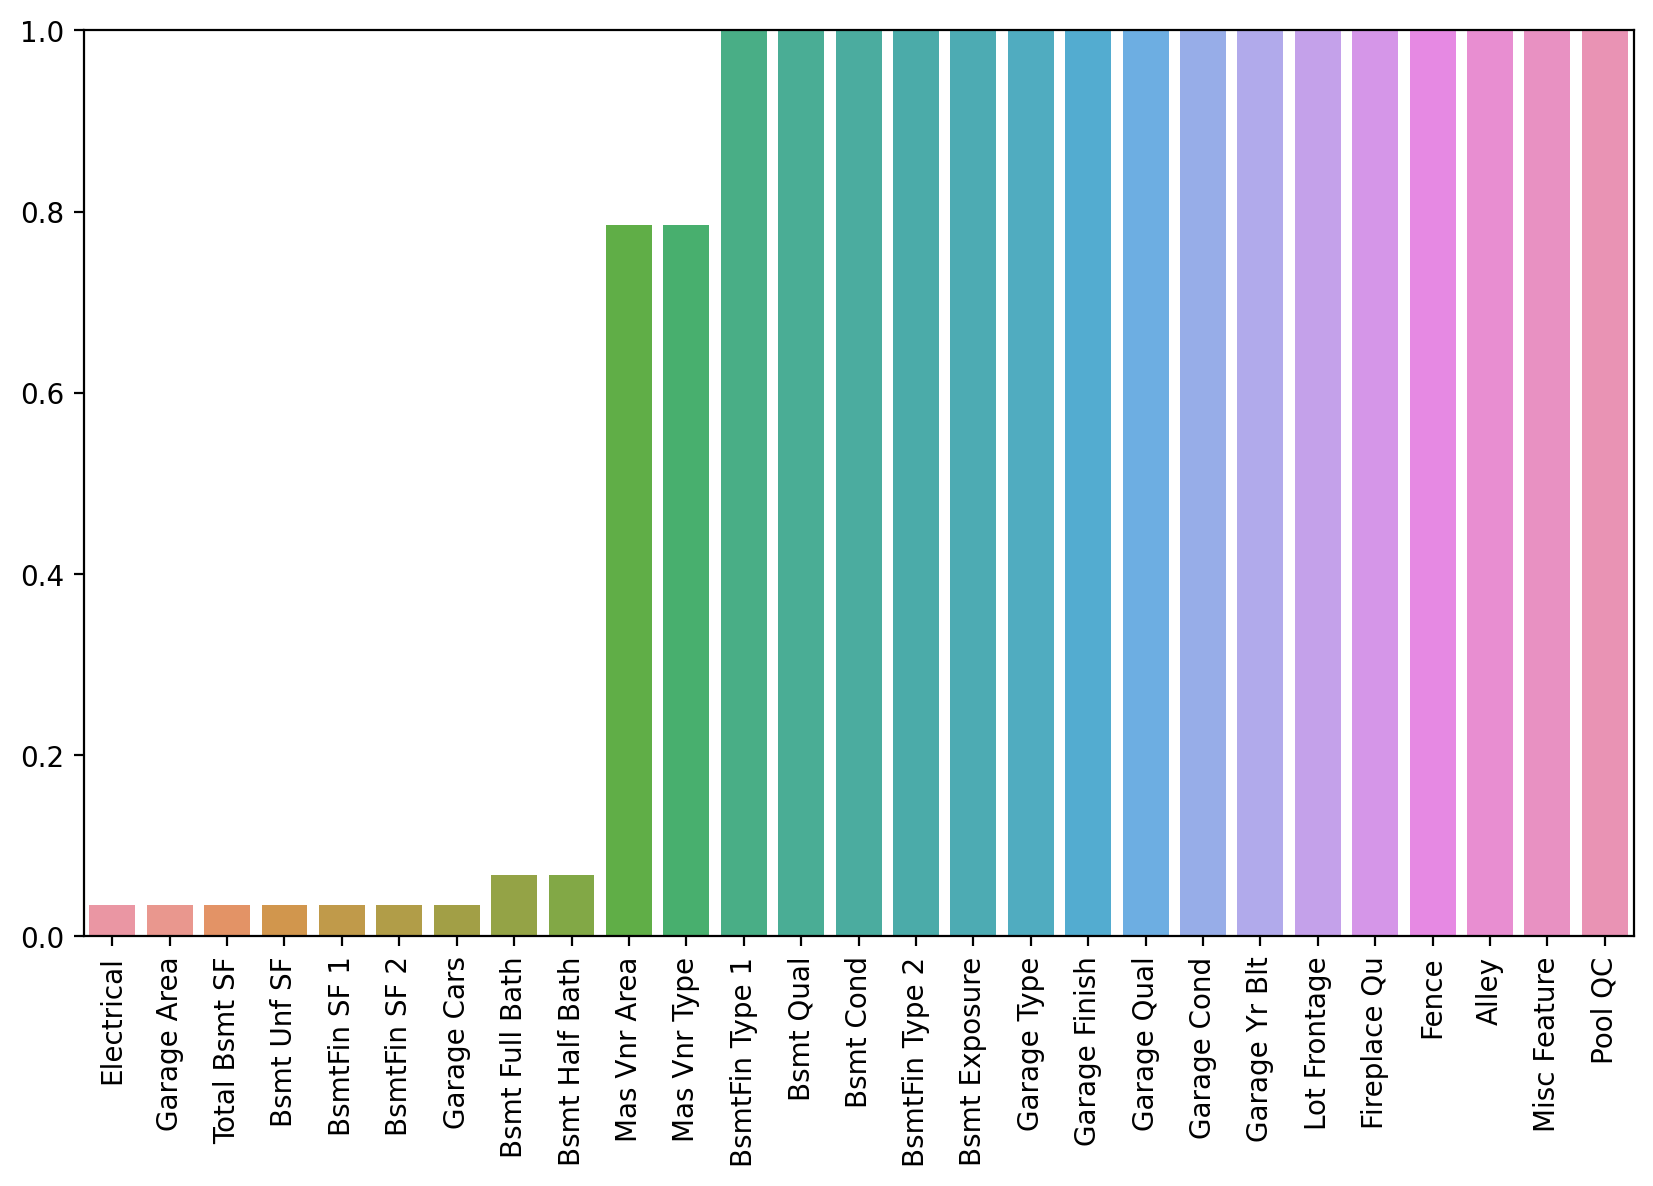

In [16]:
plt.figure(figsize=(10,6),dpi = 200)
sns.barplot(x=percent_nan.index, y =percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()

In [17]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [18]:
df[df["Electrical"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [19]:
df[df["Garage Cars"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [20]:
df = df.dropna(axis = 0,subset = ["Electrical","Garage Cars"])

In [21]:
percent_nan = percent_missing(df)

In [22]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

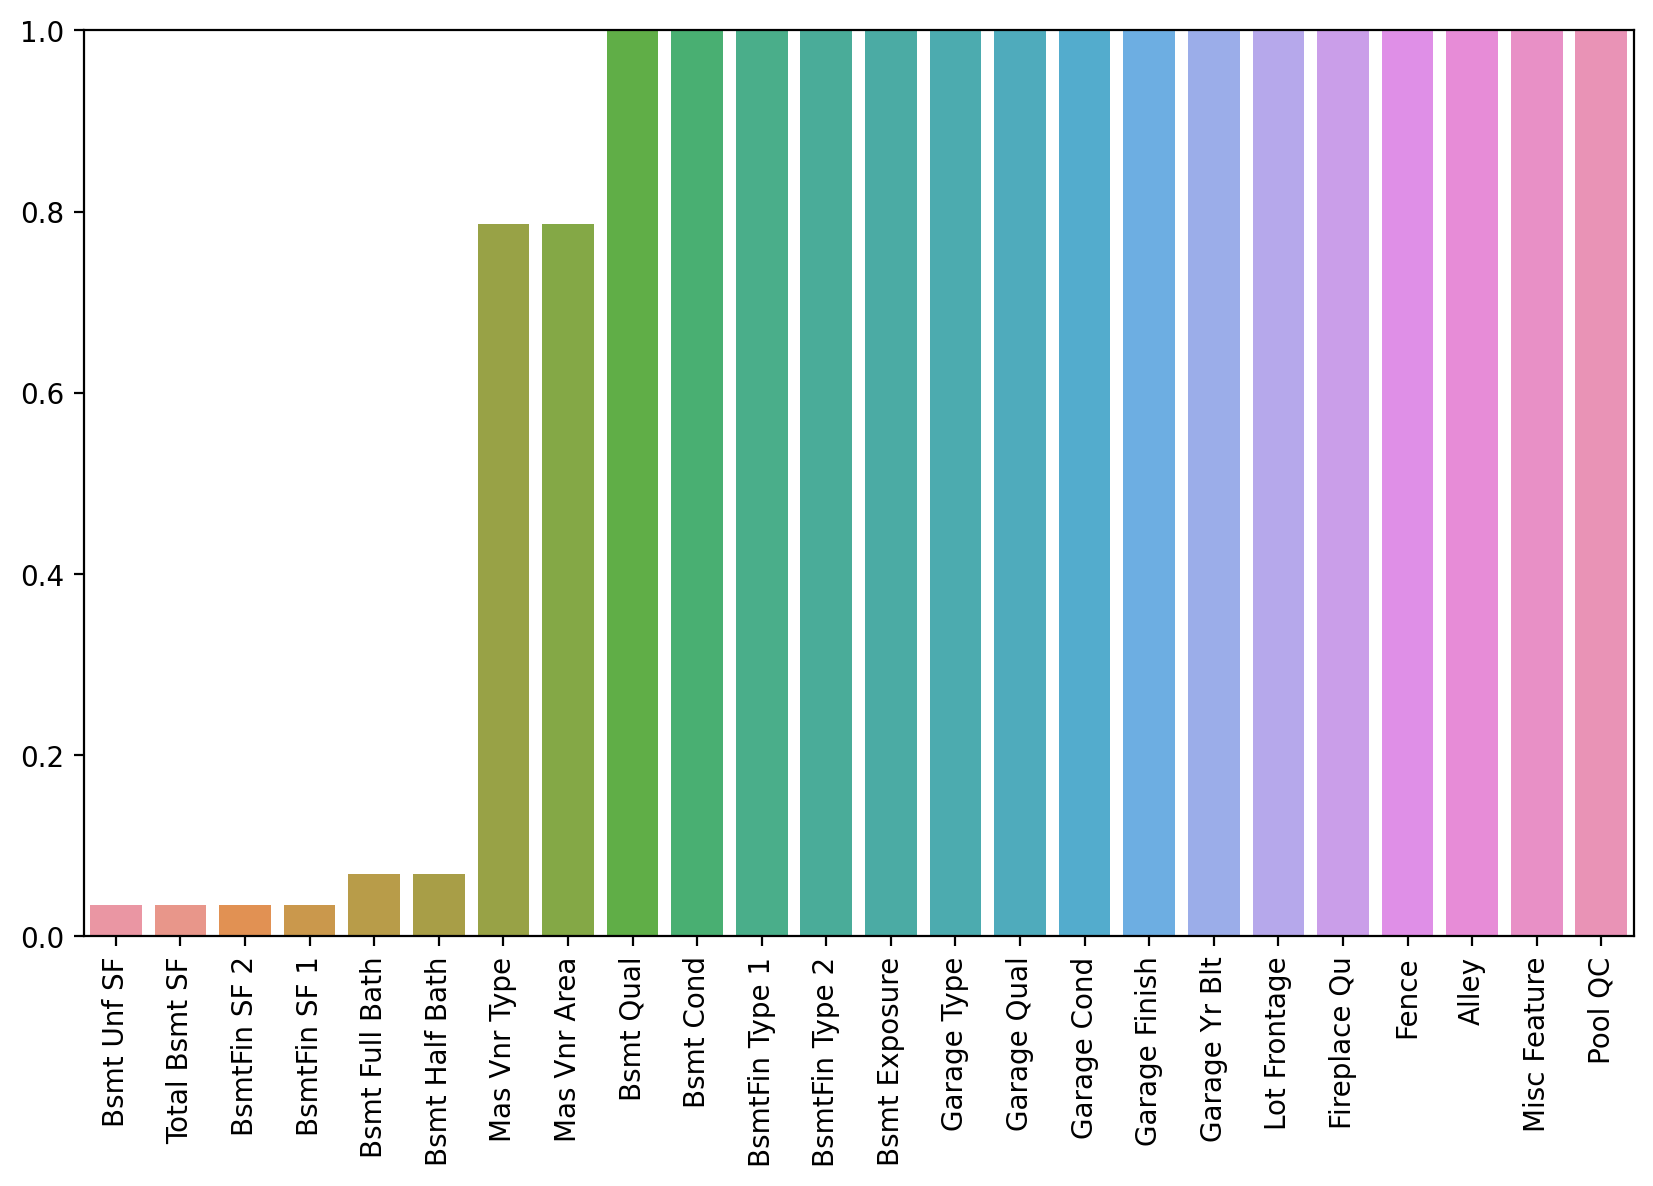

In [23]:
plt.figure(figsize=(10,6),dpi = 200)
sns.barplot(x=percent_nan.index, y =percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()

In [24]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [25]:
df["Bsmt Exposure"].value_counts()

No    1904
Av     418
Gd     281
Mn     239
Name: Bsmt Exposure, dtype: int64

In [26]:
bsmt_num_cols = ["BsmtFin SF 1","BsmtFin SF 2","Bsmt Unf SF","Total Bsmt SF","Bsmt Full Bath","Bsmt Half Bath"]

df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [27]:
bsmt_str_cols = ["Bsmt Qual","Bsmt Cond","Bsmt Exposure","BsmtFin Type 1","BsmtFin Type 2"]
df[bsmt_str_cols] = df[bsmt_str_cols].fillna("None")

In [28]:
percent_nan = percent_missing(df)

In [29]:
percent_nan[percent_nan<1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

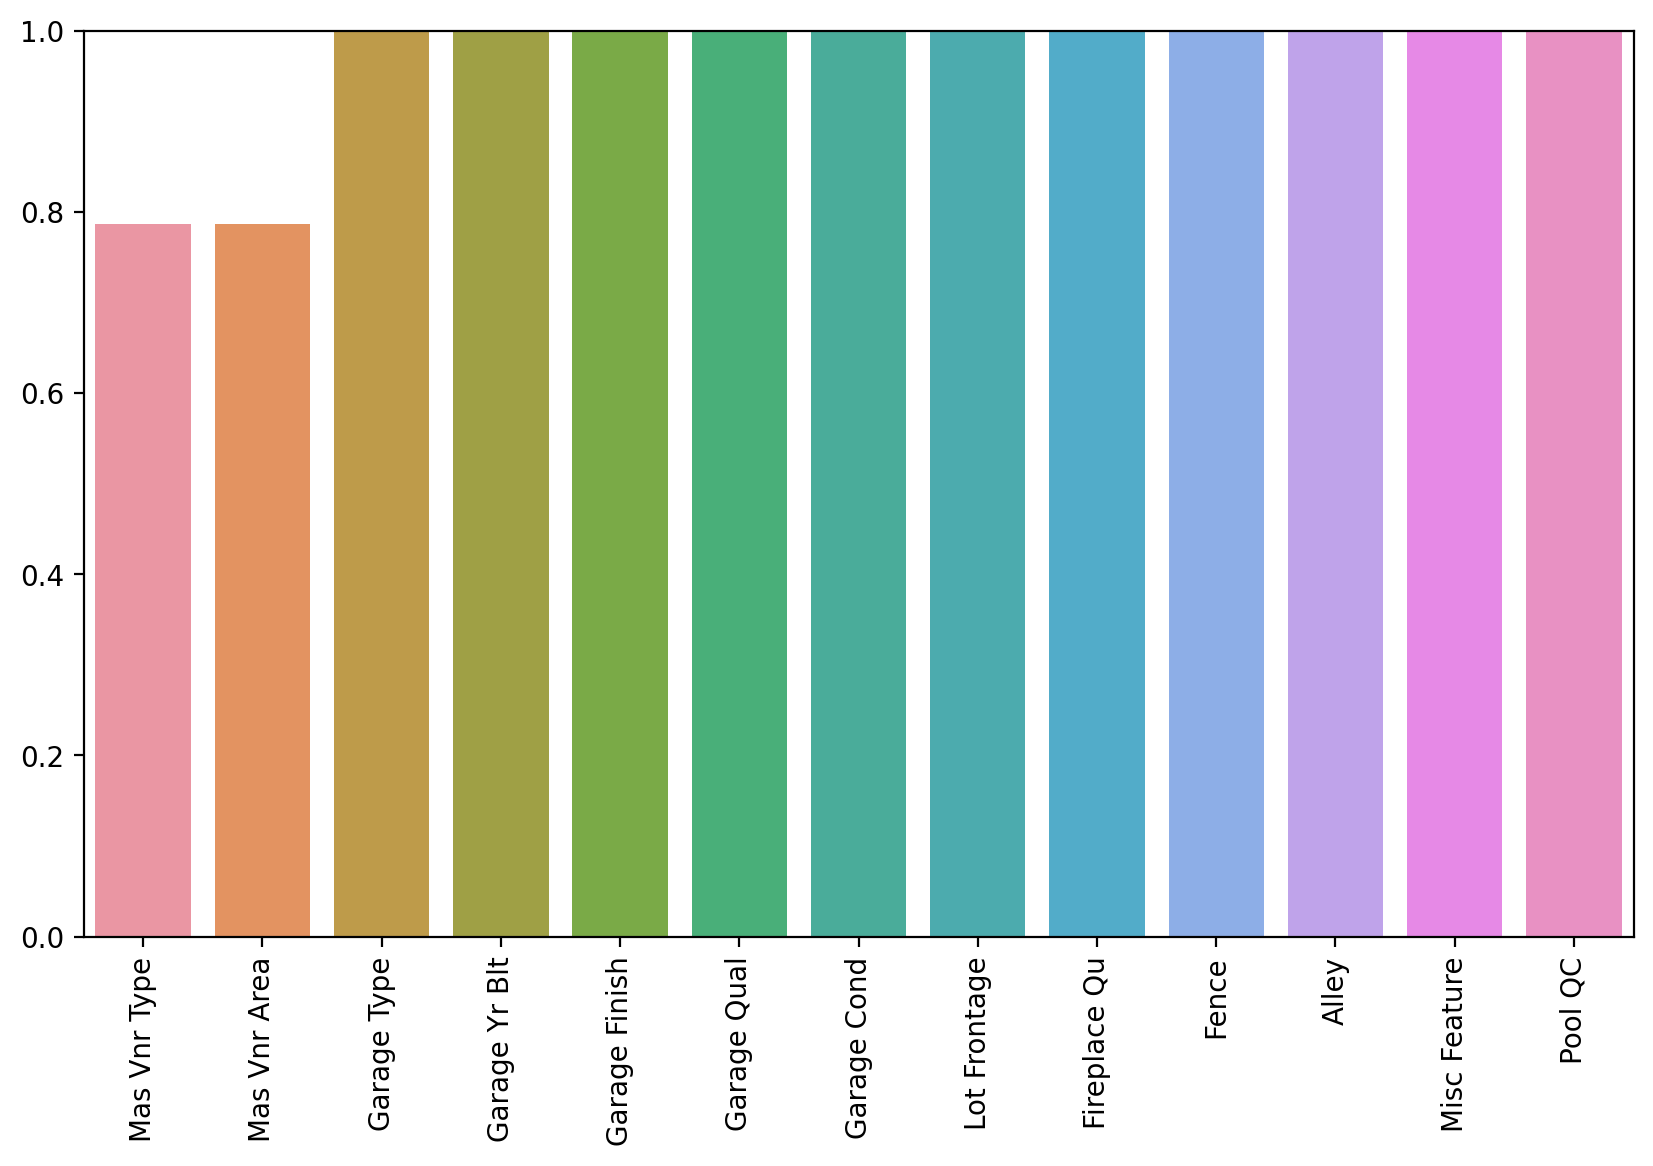

In [30]:
plt.figure(figsize=(10,6),dpi = 200)
sns.barplot(x=percent_nan.index, y =percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)
plt.show()

In [31]:
df["Mas Vnr Area"].isnull().sum()

23

In [32]:
df["Mas Vnr Type"].value_counts() 

None       1750
BrkFace     880
Stone       246
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [33]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [34]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")

In [35]:
percent_nan = percent_missing(df)

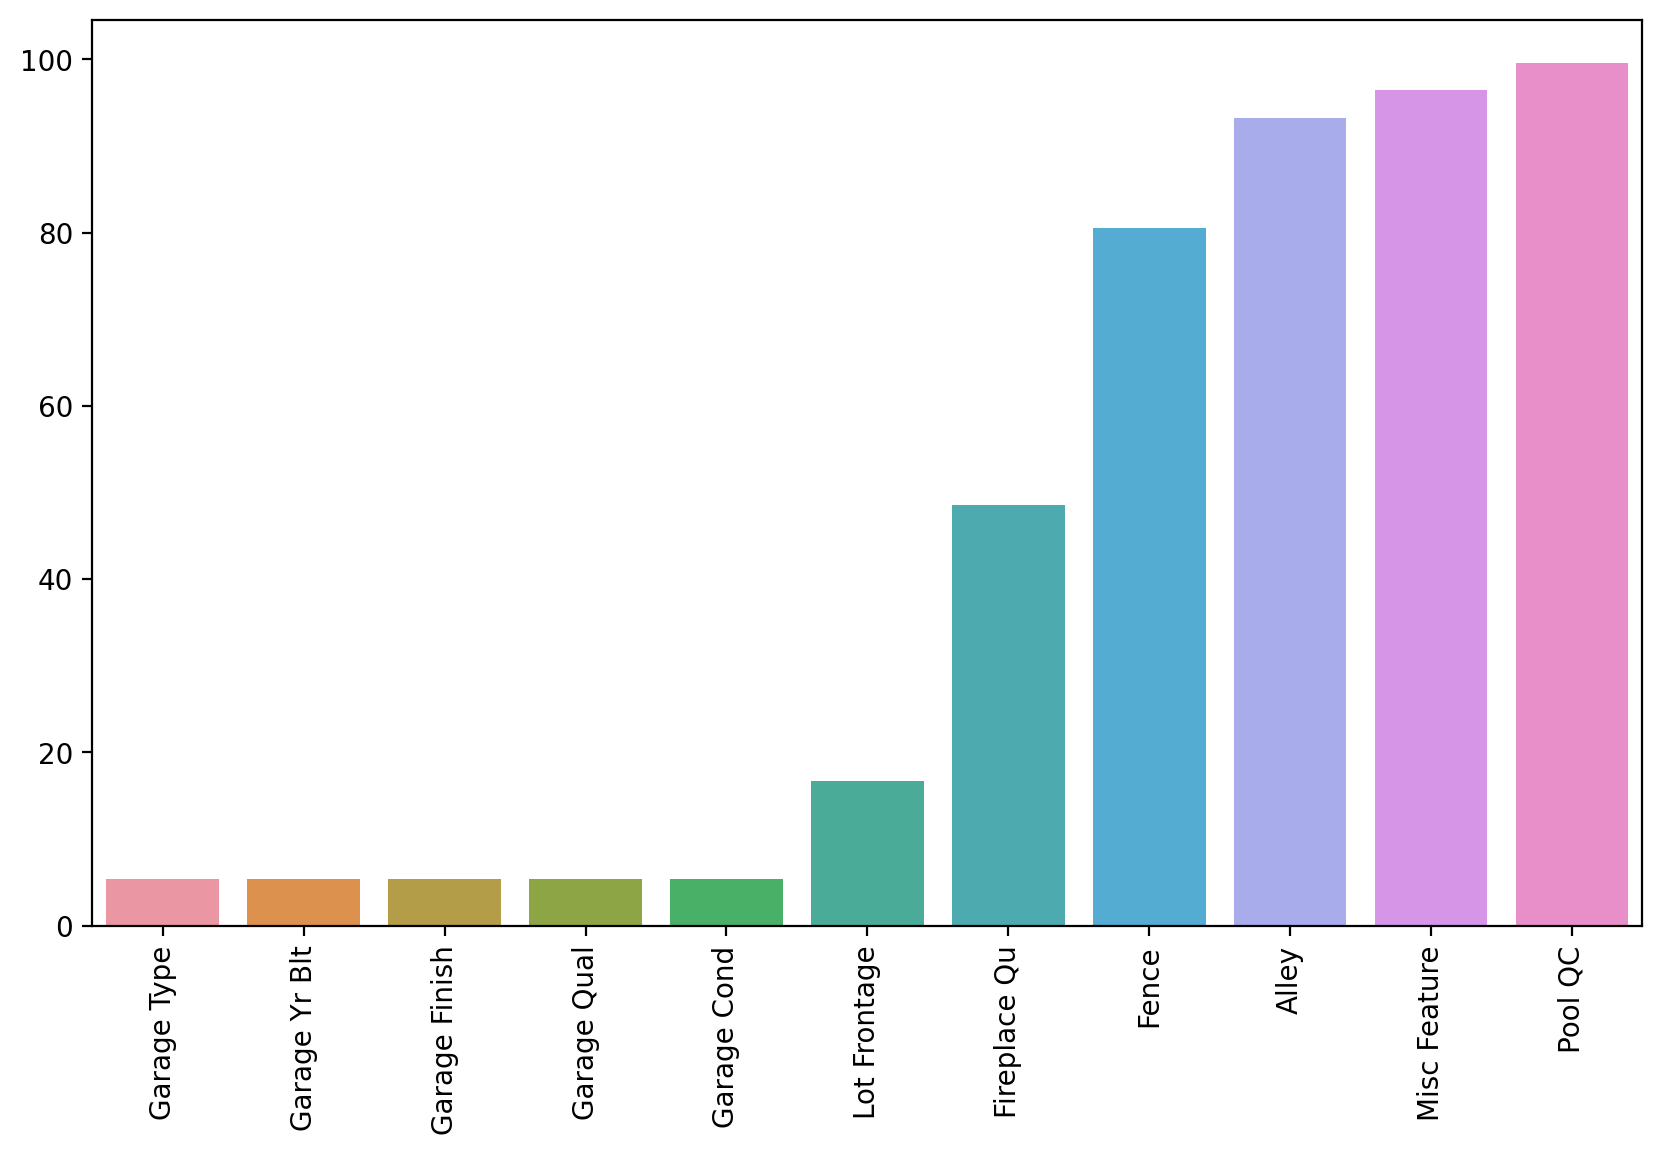

In [36]:
plt.figure(figsize=(10,6),dpi = 200)
sns.barplot(x=percent_nan.index, y =percent_nan)
plt.xticks(rotation = 90)
#plt.ylim(0,1)
plt.show()

In [37]:
df["Garage Type"].value_counts()

Attchd     1729
Detchd      781
BuiltIn     184
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

In [38]:
percent_nan[percent_nan>1]

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

In [39]:
gar_str_cols = ["Garage Type","Garage Finish","Garage Qual","Garage Cond"]
#gar_numeric_cols = []

In [40]:
df[gar_str_cols] = df[gar_str_cols].fillna("None")

In [41]:
percent_nan = percent_missing(df)

In [42]:
percent_nan[percent_nan>1]

Garage Yr Blt     5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

In [43]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0)

In [44]:
percent_nan = percent_missing(df)

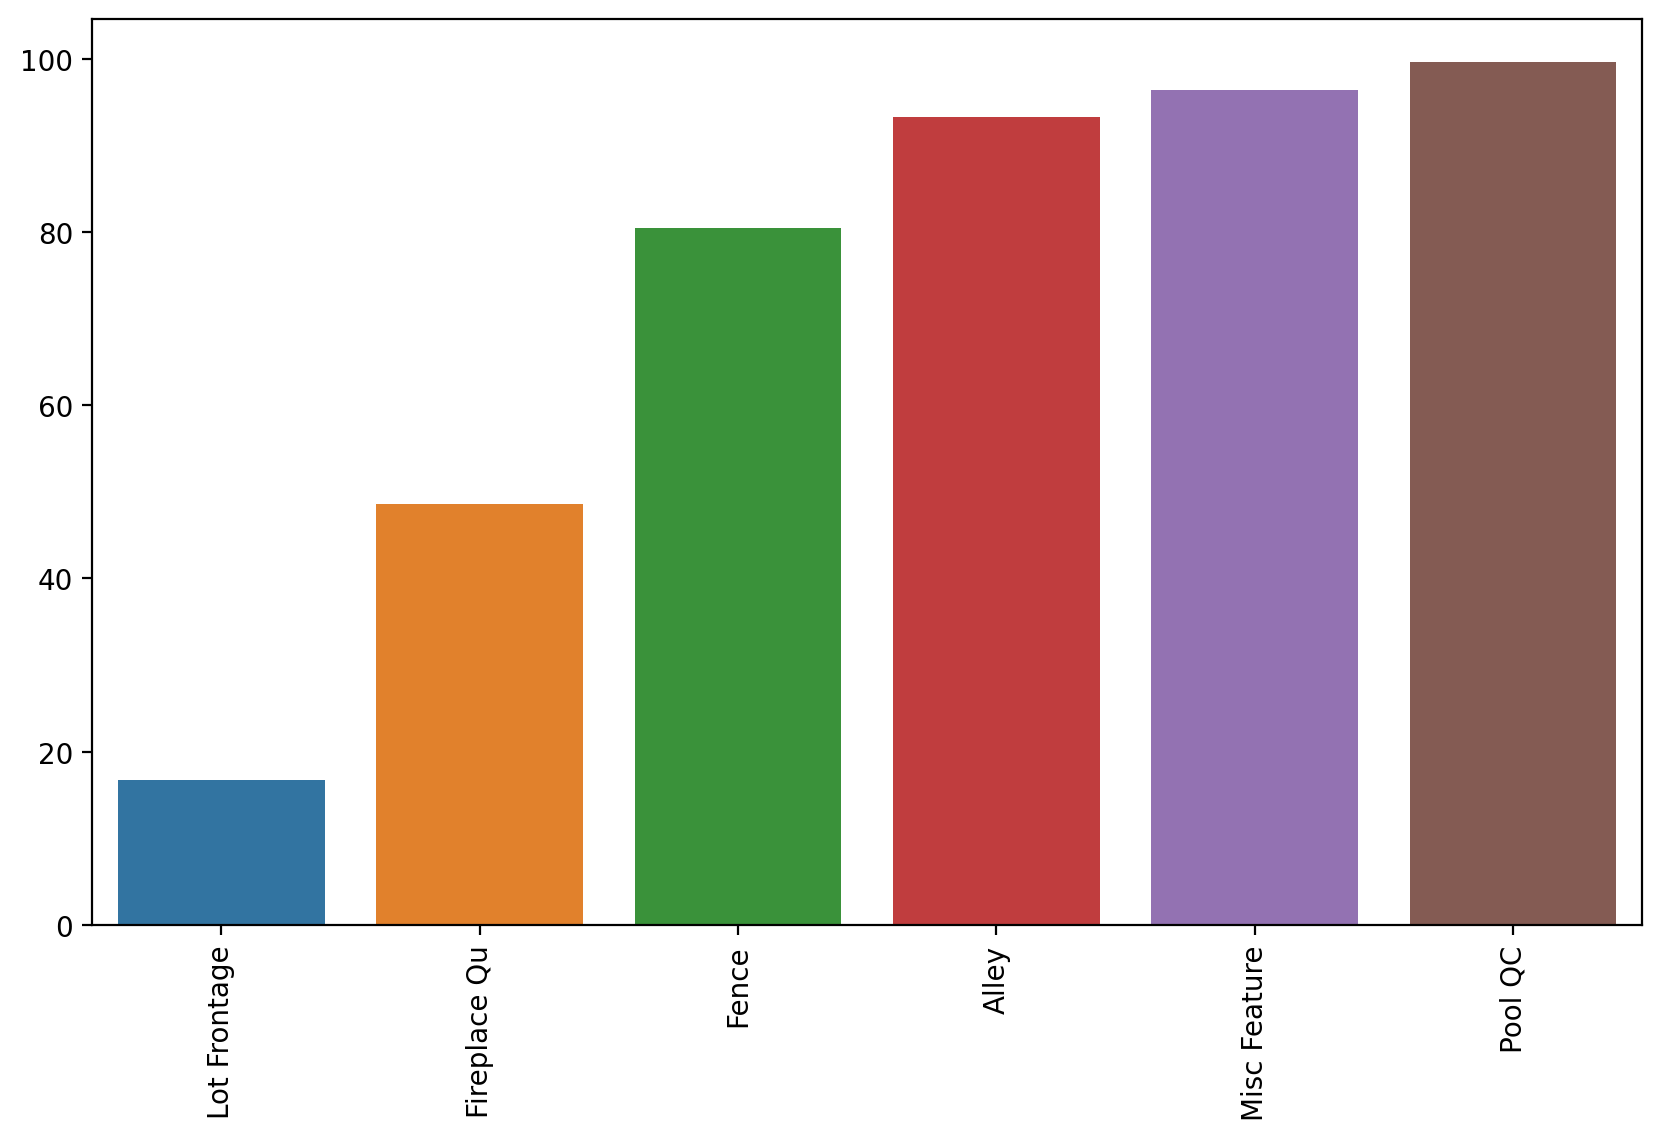

In [45]:
plt.figure(figsize=(10,6),dpi = 200)
sns.barplot(x=percent_nan.index, y =percent_nan)
plt.xticks(rotation = 90)
#plt.ylim(0,1)
plt.show()

In [46]:
df =df.drop(["Pool QC","Misc Feature","Alley","Fence"],axis = 1)

In [47]:
percent_nan = percent_missing(df)

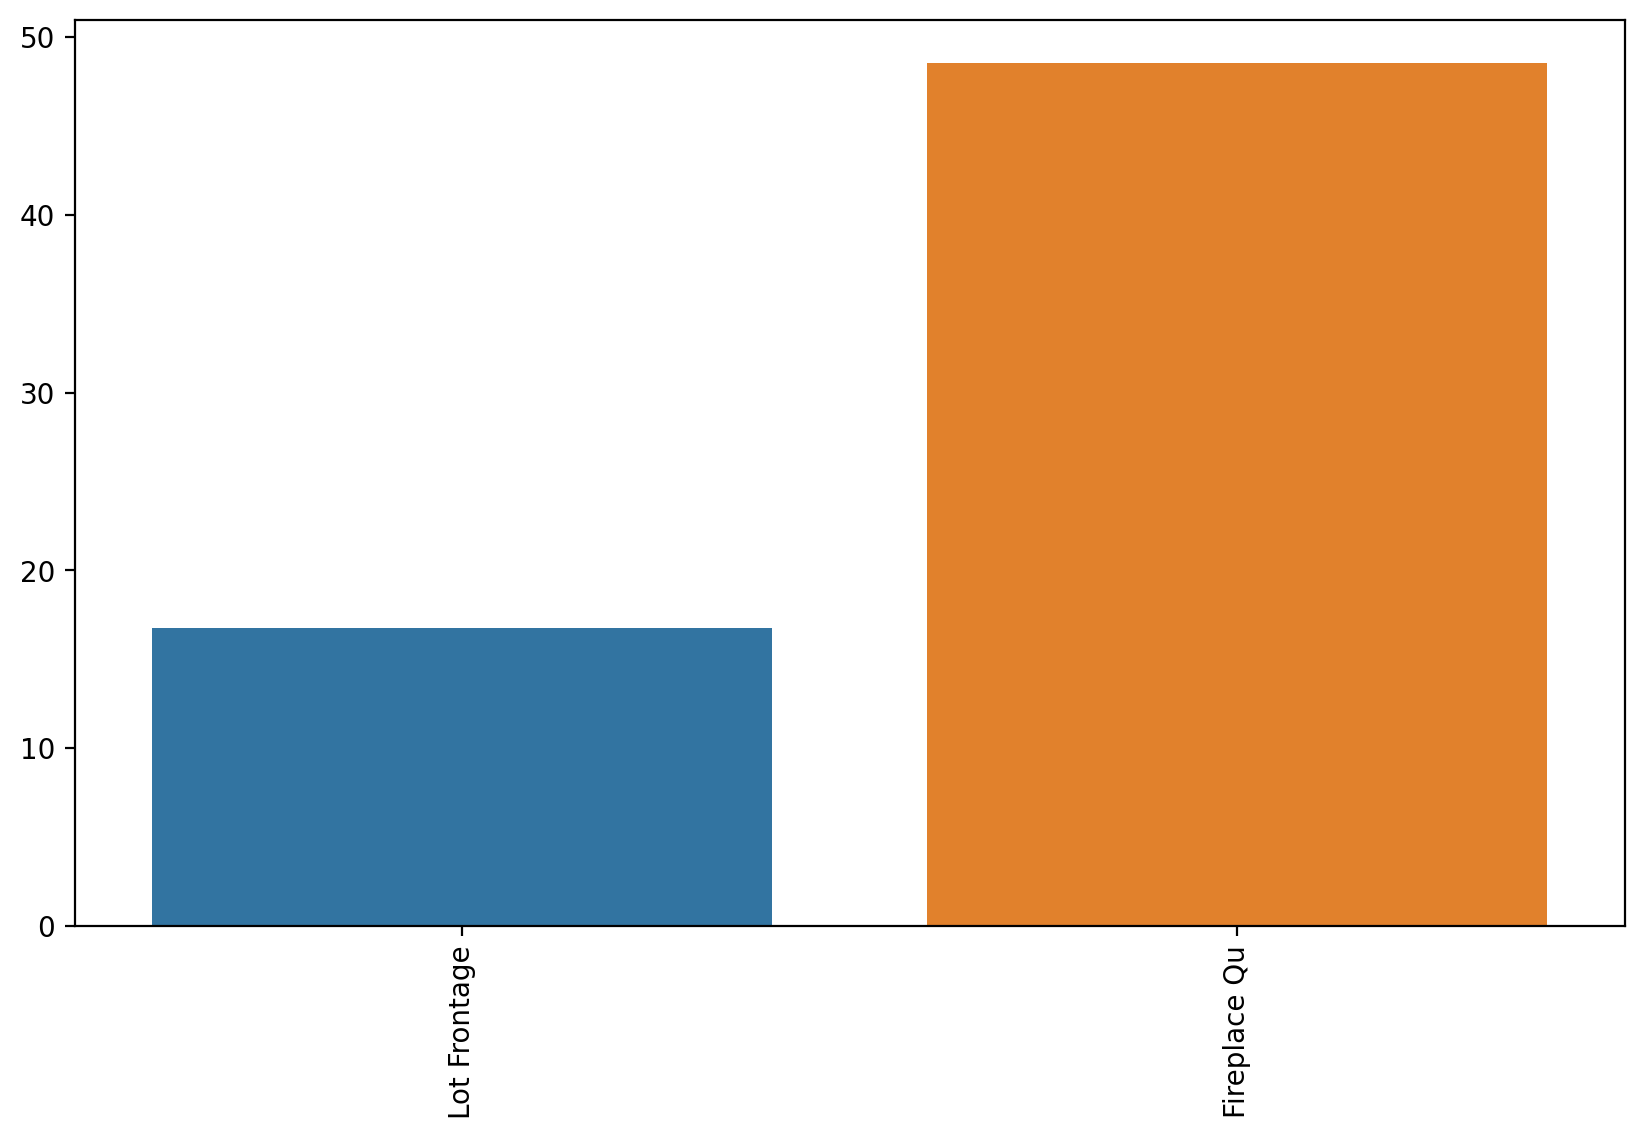

In [48]:
plt.figure(figsize=(10,6),dpi = 200)
sns.barplot(x=percent_nan.index, y =percent_nan)
plt.xticks(rotation = 90)
#plt.ylim(0,1)
plt.show()

In [49]:
df["Fireplace Qu"].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [50]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

In [51]:
df["Neighborhood"].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      92
NoRidge     71
Timber      71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [52]:
df["Lot Frontage"] = df.groupby("Neighborhood")["Lot Frontage"].transform(lambda x: x.fillna(x.mean()))

In [53]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [54]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)

In [55]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [56]:
percent_nan = percent_missing(df)

In [57]:
percent_nan

Series([], dtype: float64)

# Dealing with Categorical Data

In [58]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [59]:
df["MS SubClass"].value_counts()

20     1078
60      573
50      287
120     192
30      139
160     129
70      127
80      117
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MS SubClass, dtype: int64

#### We find the "MS SubClass" feature is a categorical feature which we will need to convert it to dummies later

In [60]:
df["MS SubClass"] = df["MS SubClass"].apply(str)

In [61]:
catagorical_cols = df.select_dtypes("object")
numercial_cols = df.select_dtypes("number")

In [62]:
df_obj_dummies = pd.get_dummies(catagorical_cols,drop_first = True)

In [63]:
df_obj_dummies.shape

(2925, 238)

In [64]:
df = pd.concat([numercial_cols,df_obj_dummies],axis = 1)

In [65]:
df.shape

(2925, 274)

# Machine Learning Algorithms

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(25), uint8(238)
memory usage: 1.5 MB


In [67]:
#Splitting the dataset into X-features and y-target label

In [68]:
X = df.drop("SalePrice",axis=1)

In [69]:
y = df["SalePrice"]

In [70]:
#Getting the train and test data from train_test_split method

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [73]:
#Scaling the X_train and X_test to convert it to singular unit of measure

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
X_train = scaler.fit_transform(X_train)

In [77]:
X_test = scaler.transform(X_test)

## Model_1 : Linear Regression 

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr_model = LinearRegression()

In [80]:
# Fitting the Model

In [81]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [82]:
# Predicting with the model

In [83]:
y_pred = lr_model.predict(X_test)

In [84]:
# Finding the errors in our model

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [86]:
mean_abs_error = mean_absolute_error(y_test,y_pred)

In [87]:
mean_abs_error

14592.692470853513

In [88]:
root_mean_squared_error = np.sqrt(mean_squared_error(y_test,y_pred)) # Check r2 score

In [89]:
root_mean_squared_error

20864.964006082893

In [90]:
df["SalePrice"].mean()

180815.53743589742

## Analysis of Model_1 Linear_Regression:

We find that the average sale price of our actual dataset is 180815 approx. In our machine learning model we find that if we use Linear Regression model we will get an error of approx 14592 using mean absolute error and 20864 if we use root mean squared error.

# Model_2 : ElasticNet Regression

In [91]:
from sklearn.linear_model import ElasticNet

In [92]:
en_model = ElasticNet(max_iter = 100000)

In [93]:
# We will setup a grid search to fine tune our hyperparameters

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {"alpha":[1,5,8,20,60,100],
              "l1_ratio":[.1,.5,.7,.99,1]}

In [96]:
grid_model = GridSearchCV(estimator = en_model,
                         param_grid = param_grid,
                         scoring = "neg_mean_squared_error",
                         cv = 5,
                         verbose = 1
                         )

In [97]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [1, 5, 8, 20, 60, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [98]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [100]:
y_pred = grid_model.predict(X_test)

In [101]:
MAE = mean_absolute_error(y_test,y_pred)

In [102]:
MAE

14195.35490056217

In [103]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

In [104]:
RMSE

20558.508566893164

In [105]:
df["SalePrice"].mean()

180815.53743589742

## Analysis of Model_2 ElasticNet_Regression Model:

We find that the average sale price of our actual dataset is 180815 approx. In our machine learning model we find that if we use ElasticNet Regression model we will get an error of approx 14195 using mean absolute error and 20558 if we use root mean squared error.

# Model_3 : Random Forest Regression

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rfr_model = RandomForestRegressor()

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid_2 = {"max_depth": [2,3,4,5],
                "min_samples_split":[2,5,6],
                "max_leaf_nodes":[2,4,6],
                "n_estimators":[100]                    
}

In [110]:
grid_model_2 = GridSearchCV(estimator = rfr_model,
                         param_grid = param_grid_2,
                         scoring = "neg_mean_squared_error",
                         cv = 5,
                         verbose = 1
                         )

In [111]:
grid_model_2.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5], 'max_leaf_nodes': [2, 4, 6],
                         'min_samples_split': [2, 5, 6],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=1)

In [112]:
grid_model_2.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [114]:
y_pred = grid_model_2.predict(X_test)

In [115]:
MAE = mean_absolute_error(y_test,y_pred)

In [116]:
MAE

26385.38905978909

In [117]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

In [118]:
RMSE

35366.22939748277

## Analysis of Model_3 Random Forest Regression:

We found that using Random Forest Regression our prediction did not improve. We may need to tune our parameters more to get the best result

In [119]:
#knn....r2...make chart about preds and actual